# Multioutput Model
 - 이전엔 output이 1개였으나, 이젠 2개이상을 공부해본다.
 - tf.layers는 feature engineering, 단순 산수 등에도 활용이 가능!
 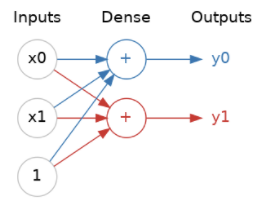

### layers.Add
 - input의 shape는 상관없이, output노드의 개수만 동일하면 서로 output layer를 공유하게해주는 메소드 (?)
 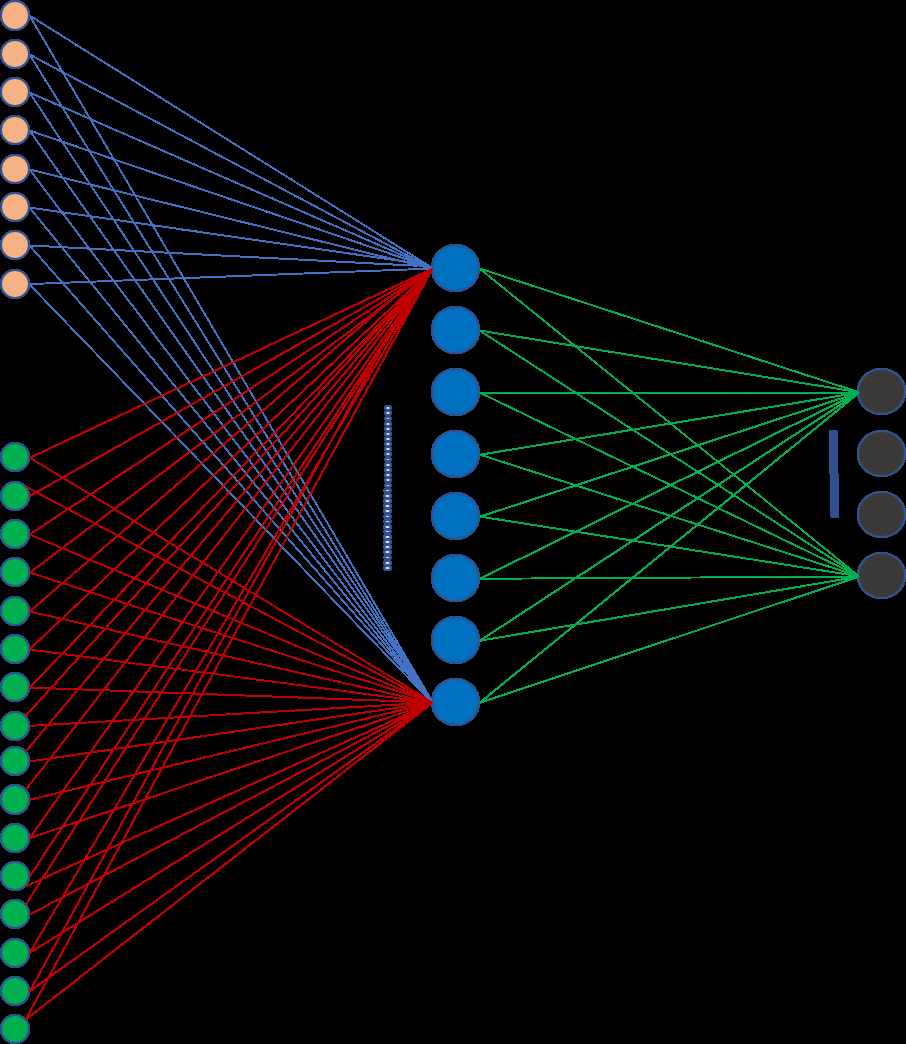

In [6]:
import tensorflow as tf
input1 = tf.keras.layers.Input(shape=(16,))
x1 = tf.keras.layers.Dense(8, activation='relu')(input1)
input2 = tf.keras.layers.Input(shape=(32,))
x2 = tf.keras.layers.Dense(8, activation='relu')(input2)
added = tf.keras.layers.Add()([x1, x2]) # = added = tf.keras.layers.add([x1, x2])
out = tf.keras.layers.Dense(4)(added)
model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 8)            136         input_7[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 8)            264         input_8[0][0]                    
_______________________________________________________________________________________

### 모델의 비선형성
 - 그저 input노드와 output노드가 많아도, 이는 여전히 선형성이 유지된다.
 - 비선형성이 추가되어야 모든 세상을 표현할 수 있음
 - 비선형성을 추가하는 방법 중 하나는 activation function을 활용하는 것!

### 예시: relu
 - 활성함수가 없을 때: y = wx + b
 - 활성함수가 생길 때: y= max(wx+b, 0)

# 구현
 - 주의: Sequentail 내부에 layer를 정의하는데, 형태가 [later, later, later, ...]임을 기억하자.
 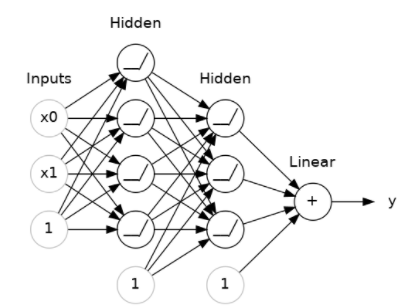

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, input_shape=[2], activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Exercise

In [14]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [17]:
import pandas as pd
concrete = pd.read_csv('./data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
### 두가지는 동일한코드!
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[8]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])